In [177]:
import numpy as np
import pandas as pd
import altair as alt

# 3.1

In [178]:
!head -20 ../data/frog_tongue_adhesion.csv

# These data are from the paper,
#   Kleinteich and Gorb, Sci. Rep., 4, 5225, 2014.
# It was featured in the New York Times.
#    http://www.nytimes.com/2014/08/25/science/a-frog-thats-a-living-breathing-pac-man.html
#
# The authors included the data in their supplemental information.
#
# Importantly, the ID refers to the identifites of the frogs they tested.
#   I:   adult, 63 mm snout-vent-length (SVL) and 63.1 g body weight,
#        Ceratophrys cranwelli crossed with Ceratophrys cornuta
#   II:  adult, 70 mm SVL and 72.7 g body weight,
#        Ceratophrys cranwelli crossed with Ceratophrys cornuta
#   III: juvenile, 28 mm SVL and 12.7 g body weight, Ceratophrys cranwelli
#   IV:  juvenile, 31 mm SVL and 12.7 g body weight, Ceratophrys cranwelli
date,ID,trial number,impact force (mN),impact time (ms),impact force / body weight,adhesive force (mN),time frog pulls on target (ms),adhesive force / body weight,adhesive impulse (N-s),total contact area (mm2),contact area without mucus (m

In [179]:
df_frog = pd.DataFrame(index=['I', 'II', 'III', 'IV'],
                       data={'age': ['adult', 'adult', 'juvenile', 'juvenile'],
                             'SVL (mm)': [63, 70, 28, 31],
                             'weight (g)': [63.1, 72.7, 12.7, 12.7],
                             'species': ['cross', 'cross', 'cranwelli', 'cranwelli']})

df_frog = df_frog.reset_index()
df_frog = df_frog.rename(index=str, columns={"index": "ID"})
df_frog.head()

ID       age  SVL (mm)  weight (g)    species
0    I     adult        63        63.1      cross
1   II     adult        70        72.7      cross
2  III  juvenile        28        12.7  cranwelli
3   IV  juvenile        31        12.7  cranwelli

In [180]:
df_main = pd.read_csv('../data/frog_tongue_adhesion.csv', comment='#')
df_main.head()

date ID  trial number  impact force (mN)  impact time (ms)  \
0  2013_02_26  I             3               1205                46   
1  2013_02_26  I             4               2527                44   
2  2013_03_01  I             1               1745                34   
3  2013_03_01  I             2               1556                41   
4  2013_03_01  I             3                493                36   

   impact force / body weight  adhesive force (mN)  \
0                        1.95                 -785   
1                        4.08                 -983   
2                        2.82                 -850   
3                        2.51                 -455   
4                        0.80                 -974   

   time frog pulls on target (ms)  adhesive force / body weight  \
0                             884                          1.27   
1                             248                          1.59   
2                             211                          1.37   
3                            1025                          0.74   
4                             499                          1.57   

   adhesive impulse (N-s)  total contact area (mm2)  \
0                  -0.290                       387   
1                  -0.181                       101   
2                  -0.157                        83   
3                  -0.170                       330   
4                  -0.423                       245   

   contact area without mucus (mm2)  \
0                                70   
1                                94   
2                                79   
3                               158   
4                               216   

   contact area with mucus / contact area without mucus  \
0                                               0.82      
1                                               0.07      
2                                               0.05      
3                                               0.52      
4                                               0.12      

   contact pressure (Pa)  adhesive strength (Pa)  
0                   3117                   -2030  
1                  24923                   -9695  
2                  21020                  -10239  
3                   4718                   -1381  
4                   2012                   -3975

In [181]:
df_with_metadata = pd.merge(df_frog,df_main)
df_with_metadata.head()

ID    age  SVL (mm)  weight (g) species        date  trial number  \
0  I  adult        63        63.1   cross  2013_02_26             3   
1  I  adult        63        63.1   cross  2013_02_26             4   
2  I  adult        63        63.1   cross  2013_03_01             1   
3  I  adult        63        63.1   cross  2013_03_01             2   
4  I  adult        63        63.1   cross  2013_03_01             3   

   impact force (mN)  impact time (ms)  impact force / body weight  \
0               1205                46                        1.95   
1               2527                44                        4.08   
2               1745                34                        2.82   
3               1556                41                        2.51   
4                493                36                        0.80   

   adhesive force (mN)  time frog pulls on target (ms)  \
0                 -785                             884   
1                 -983                             248   
2                 -850                             211   
3                 -455                            1025   
4                 -974                             499   

   adhesive force / body weight  adhesive impulse (N-s)  \
0                          1.27                  -0.290   
1                          1.59                  -0.181   
2                          1.37                  -0.157   
3                          0.74                  -0.170   
4                          1.57                  -0.423   

   total contact area (mm2)  contact area without mucus (mm2)  \
0                       387                                70   
1                       101                                94   
2                        83                                79   
3                       330                               158   
4                       245                               216   

   contact area with mucus / contact area without mucus  \
0                                               0.82      
1                                               0.07      
2                                               0.05      
3                                               0.52      
4                                               0.12      

   contact pressure (Pa)  adhesive strength (Pa)  
0                   3117                   -2030  
1                  24923                   -9695  
2                  21020                  -10239  
3                   4718                   -1381  
4                   2012                   -3975

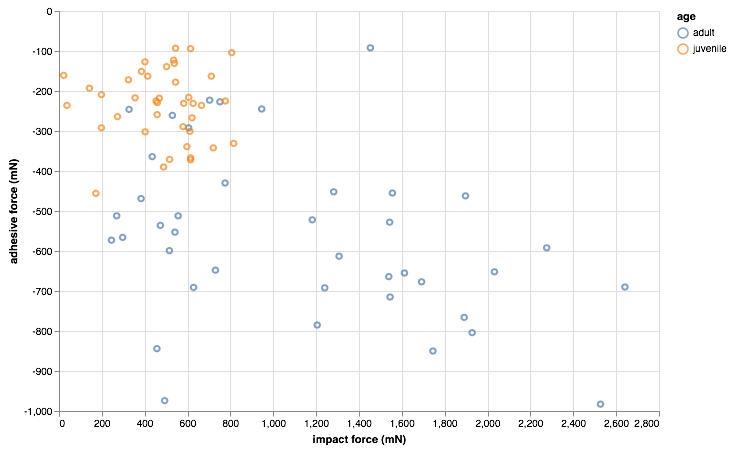

In [182]:
alt.Chart(
        df_with_metadata,
        height=400,
        width=600
    ).mark_point(
    ).encode(x='impact force (mN):Q',
             y='adhesive force (mN):Q',
             color = 'age:N')

# 4.3

In [183]:
!head -20 ../data/grant_2012.csv

# Data taken from the book
#   Grant, PR, Grant, BR (2014) 40 years of evolution:
#   Darwin's finches on Daphne Major Island.
#   Princeton: Princeton University Press.
#
# Accessed throug the Dryad data package:
#   Grant PR, Grant BR(2014) Data from: 40 years of evolution.
#   Darwin's finches on Daphne Major Island. Dryad Digital Repository.
#   http://dx.doi.org/10.5061/dryad.g6g3h
#
# The data appear as in the original file
#        Fig. 10-03 data, 12.csv
#
band,species,blength,bdepth
19022,fortis,10,8.5
19028,fortis,12.5,8.9
19032,fortis,9.3,7.5
19041,fortis,10.3,9.6
19044,fortis,11,9.2
19048,fortis,10.1,8.2


### a

In [184]:
df_finch_1973 = pd.read_csv('../data/grant_1973.csv', comment='#')
df_finch_1975 = pd.read_csv('../data/grant_1975.csv', comment='#')
df_finch_1987 = pd.read_csv('../data/grant_1987.csv', comment='#')
df_finch_1991 = pd.read_csv('../data/grant_1991.csv', comment='#')
df_finch_2012 = pd.read_csv('../data/grant_2012.csv', comment='#')

In [185]:
df_finch_1973.head()

band species  yearband  beak length  beak depth
0  20123  fortis        73         9.25        8.05
1  20126  fortis        73        11.35       10.45
2  20128  fortis        73        10.15        9.55
3  20129  fortis        73         9.95        8.75
4  20133  fortis        73        11.55       10.15

In [186]:
df_finch_1973 = (df_finch_1973
                 .rename(index=str,
                         columns={"yearband": "year",
                                  "beak length": "beak length (mm)",
                                  "beak depth": "beak depth (mm)"}))

df_finch_1973.head()

band species  year  beak length (mm)  beak depth (mm)
0  20123  fortis    73              9.25             8.05
1  20126  fortis    73             11.35            10.45
2  20128  fortis    73             10.15             9.55
3  20129  fortis    73              9.95             8.75
4  20133  fortis    73             11.55            10.15

### b

In [187]:
df_finch_1973['year'] = 1973
df_finch_1973.head()

band species  year  beak length (mm)  beak depth (mm)
0  20123  fortis  1973              9.25             8.05
1  20126  fortis  1973             11.35            10.45
2  20128  fortis  1973             10.15             9.55
3  20129  fortis  1973              9.95             8.75
4  20133  fortis  1973             11.55            10.15

In [188]:
df_finch_1975['year'] = 1975
df_finch_1987['year'] = 1987
df_finch_1991['year'] = 1991
df_finch_2012['year'] = 2012

df_finch_2012.head()

band species  blength  bdepth  year
0  19022  fortis     10.0     8.5  2012
1  19028  fortis     12.5     8.9  2012
2  19032  fortis      9.3     7.5  2012
3  19041  fortis     10.3     9.6  2012
4  19044  fortis     11.0     9.2  2012

In [189]:
#df_finch_2012.columns = ['üòã','üòÅ','üòÇ','ü§£','üòÖ']

In [190]:
df_finch_1975.head()

band species  Beak length, mm  Beak depth, mm  year
0     2  fortis              9.4             8.0  1975
1     9  fortis              9.2             8.3  1975
2    12  fortis              9.5             7.5  1975
3    15  fortis              9.5             8.0  1975
4   305  fortis             11.5             9.9  1975

In [191]:
column_rename = {"Beak length, mm": "beak length (mm)",
                 "Beak depth, mm": "beak depth (mm)"}

column_rename_2 = {"blength": "beak length (mm)",
                   "bdepth": "beak depth (mm)"}

df_finch_1975 = (df_finch_1975
                 .rename(index=str,
                         columns=column_rename))

df_finch_1987 = (df_finch_1987
                 .rename(index=str,
                         columns=column_rename))

df_finch_1991 = (df_finch_1991
                 .rename(index=str,
                         columns=column_rename_2))

df_finch_2012 = (df_finch_2012
                 .rename(index=str,
                         columns=column_rename_2))
df_finch_2012.head()

band species  beak length (mm)  beak depth (mm)  year
0  19022  fortis              10.0              8.5  2012
1  19028  fortis              12.5              8.9  2012
2  19032  fortis               9.3              7.5  2012
3  19041  fortis              10.3              9.6  2012
4  19044  fortis              11.0              9.2  2012

In [199]:
df_grant_complete = pd.concat([df_finch_1973,
                              df_finch_1975,
                              df_finch_1987,
                              df_finch_1991,
                              df_finch_2012],
                              sort=True,
                              ignore_index=True)
df_grant_complete.head()

band  beak depth (mm)  beak length (mm) species  year
0  20123             8.05              9.25  fortis  1973
1  20126            10.45             11.35  fortis  1973
2  20128             9.55             10.15  fortis  1973
3  20129             8.75              9.95  fortis  1973
4  20133            10.15             11.55  fortis  1973

### c

In [200]:
df_grant_complete = df_grant_complete.drop_duplicates(['band','year'])
df_grant_complete.head()

band  beak depth (mm)  beak length (mm) species  year
0  20123             8.05              9.25  fortis  1973
1  20126            10.45             11.35  fortis  1973
2  20128             9.55             10.15  fortis  1973
3  20129             8.75              9.95  fortis  1973
4  20133            10.15             11.55  fortis  1973

### d

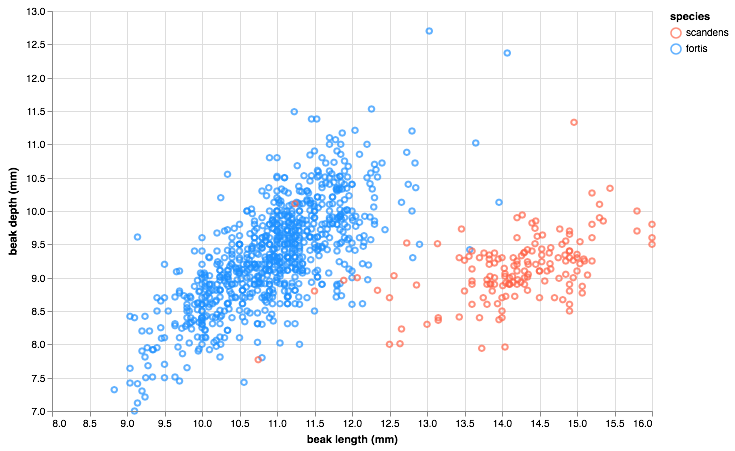

In [205]:
alt.Chart(
        df_grant_complete.loc[df_grant_complete['year'] == 1987],
        height=400,
        width=600
    ).mark_point(
    ).encode(x=alt.X('beak length (mm)',
                     type='quantitative',
                     scale=alt.Scale(zero=False)),
             
             y=alt.X('beak depth (mm)',
                     type='quantitative',
                     scale=alt.Scale(zero=False)),

             color=alt.Color('species:N',scale=alt.Scale(domain=['scandens','fortis'],
                                                         range=['tomato','dodgerblue'])))


In [300]:
scandens_plot=alt.Chart(
            df_grant_complete.loc[df_grant_complete['species'] == 'scandens'],
            height=300,
            width=500
        ).mark_point(
        ).encode(x=alt.X('beak length (mm)',
                         type='quantitative',
                         scale=alt.Scale(domain=[8,16],zero=False)),
             
                 y=alt.Y('beak depth (mm)',
                         type='quantitative',
                         scale=alt.Scale(domain=[6,13],zero=False)),

                 color=alt.Color('year:O',scale=alt.Scale(domain=[1973,1975,1987,1991,2012],
                                                             range=['#fdae6b','#fd8d3c','#f16913','#d94801','#8c2d04'])))

fortis_plot=alt.Chart(
            df_grant_complete.loc[df_grant_complete['species'] == 'fortis'],
            height=300,
            width=500
        ).mark_point(
        ).encode(x=alt.X('beak length (mm)',
                         type='quantitative',
                         scale=alt.Scale(domain=[8,16],zero=False)),
             
                 y=alt.Y('beak depth (mm)',
                         type='quantitative',
                         scale=alt.Scale(domain=[6,13],zero=False)),

                 color=alt.Color('year:O',scale=alt.Scale(domain=[1973,1975,1987,1991,2012],
                                                             range=['#9ecae1','#6baed6','#4292c6','#2171b5','#084594'])))




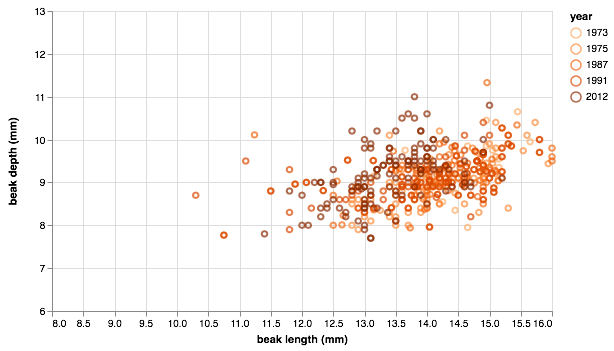

In [301]:
scandens_plot

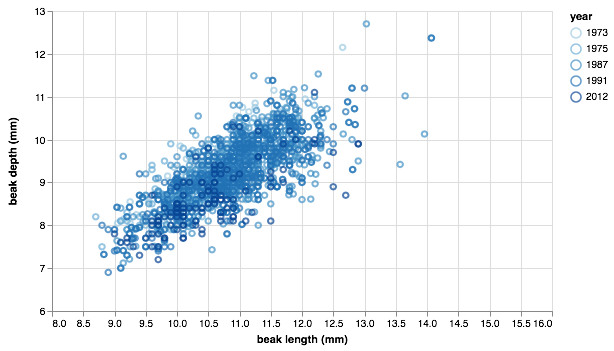

In [303]:
fortis_plot

# Exercise 3.3
### a

In [294]:
!head -20 ../data/fisher_iris.csv

sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa
4.6,3.4,1.4,0.3,setosa
5.0,3.4,1.5,0.2,setosa
4.4,2.9,1.4,0.2,setosa
4.9,3.1,1.5,0.1,setosa
5.4,3.7,1.5,0.2,setosa
4.8,3.4,1.6,0.2,setosa
4.8,3.0,1.4,0.1,setosa
4.3,3.0,1.1,0.1,setosa
5.8,4.0,1.2,0.2,setosa
5.7,4.4,1.5,0.4,setosa
5.4,3.9,1.3,0.4,setosa
5.1,3.5,1.4,0.3,setosa
5.7,3.8,1.7,0.3,setosa


In [296]:
df_fisher_iris = pd.read_csv('../data/fisher_iris.csv')

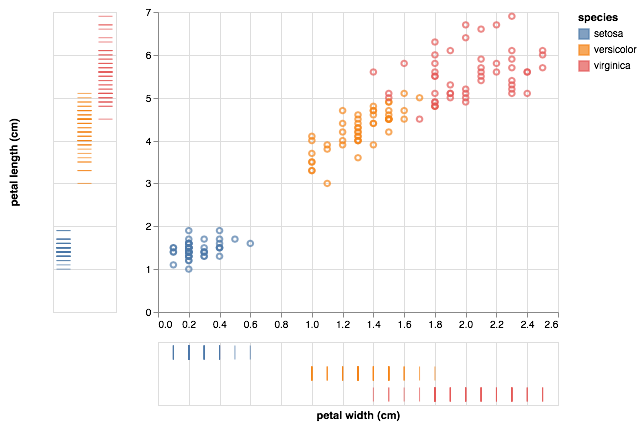

In [311]:
brush = alt.selection(type='interval')

tick_axis = alt.Axis(labels=False, domain=False, ticks=False)
tick_axis_notitle = alt.Axis(labels=False, domain=False, ticks=False, title='')

points = alt.Chart(df_fisher_iris).mark_point().encode(
    x=alt.X('petal width (cm)', axis=alt.Axis(title='')),
    y=alt.Y('petal length (cm)', axis=alt.Axis(title='')),
    color=alt.condition(brush, 'species', alt.value('grey'))
).add_selection(
    brush
)

x_ticks = alt.Chart(df_fisher_iris).mark_tick().encode(
    alt.X('petal width (cm)', axis=tick_axis),
    alt.Y('species', axis=tick_axis_notitle),
    color=alt.condition(brush, 'species', alt.value('lightgrey'))
).add_selection(
    brush
)

y_ticks = alt.Chart(df_fisher_iris).mark_tick().encode(
    alt.X('species', axis=tick_axis_notitle),
    alt.Y('petal length (cm)', axis=tick_axis),
    color=alt.condition(brush, 'species', alt.value('lightgrey'))
).add_selection(
    brush
)

y_ticks | (points & x_ticks)



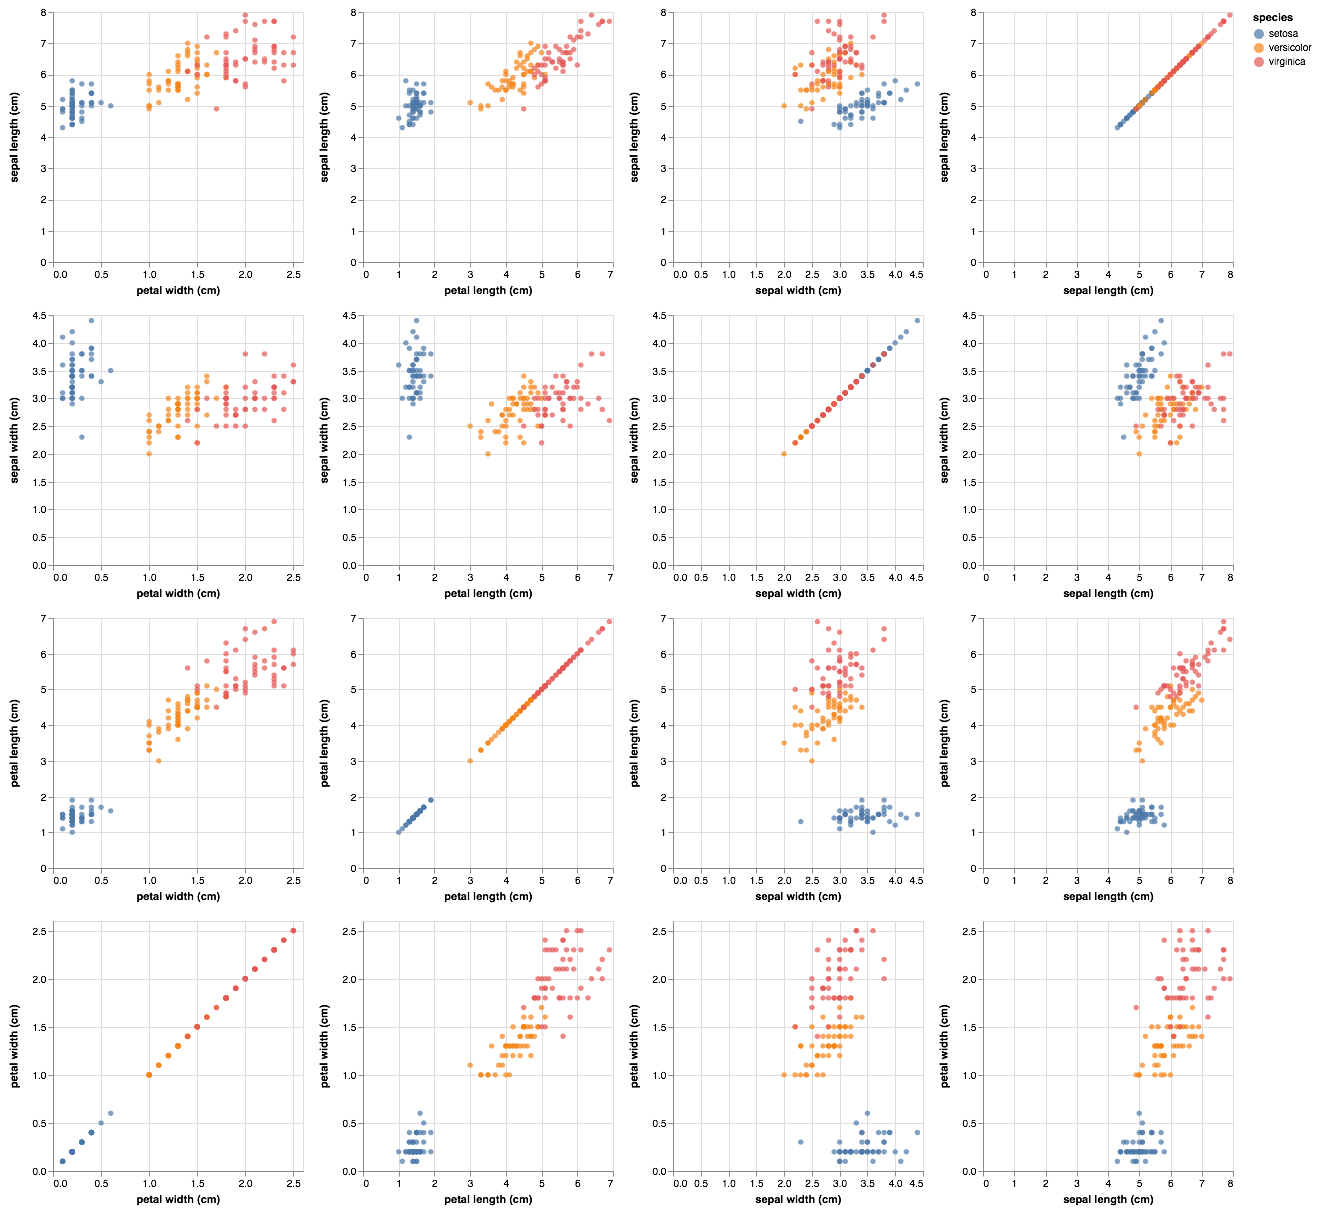

In [315]:
alt.Chart(df_fisher_iris).mark_circle().encode(
    alt.X(alt.repeat("column"), type='quantitative'),
    alt.Y(alt.repeat("row"), type='quantitative'),
    color='species:N'
).properties(
    width=250,
    height=250
).repeat(
    row=['sepal length (cm)', 'sepal width (cm)'
         ,'petal length (cm)', 'petal width (cm)'],
    column=['petal width (cm)', 'petal length (cm)', 
            'sepal width (cm)', 'sepal length (cm)']
).interactive()